In [11]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
df = pd.read_csv('/content/dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/c_parser_wrapper.py:373: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common_type = np.find_common_type(
/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/c_parser_wrapper.py:373: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.

In [13]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Timestamp,Invoice No.,Payment Type,Order Type,Area,Item Name,Price,Qty.,Sub Total,...,Address,GST,Assign To,Non Taxable,SGST Rate,SGST Amount,CGST Rate,CGST Amount,Service Charge Rate,Service Charge Amount
0,2024-01-28,2024-01-29 02:25:22,21573,Cash,Dine In,Dining,ORANGE JUICE,285.71,1.0,285.71,...,NaN,NaN,NaN,0.0,2.5,3.52,2.5,3.52,10.0,14.07
1,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,Iced Latte (350 ML),214.29,1.0,214.29,...,NaN,NaN,NaN,0.0,2.5,5.36,2.5,5.36,10.0,21.43
2,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,ALMOND MILK (200 ML),85.71,1.0,85.71,...,NaN,NaN,NaN,0.0,2.5,2.14,2.5,2.14,10.0,8.57
3,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Chicken Calzone,66.67,1.0,66.67,...,NaN,NaN,Allahbaksh Shaikh,0.0,2.5,1.67,2.5,1.67,10.0,6.67
4,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Coconut Nankhatai (with Egg),285.71,1.0,285.71,...,NaN,NaN,Allahbaksh Shaikh,0.0,2.5,7.14,2.5,7.14,10.0,28.57


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   6075 non-null   object 
 1   Timestamp              6075 non-null   object 
 2   Invoice No.            6075 non-null   object 
 3   Payment Type           6075 non-null   object 
 4   Order Type             6075 non-null   object 
 5   Area                   4737 non-null   object 
 6   Item Name              6075 non-null   object 
 7   Price                  6075 non-null   float64
 8   Qty.                   6075 non-null   float64
 9   Sub Total              6075 non-null   float64
 10  Discount               6075 non-null   float64
 11  Tax                    6075 non-null   float64
 12  Final Total            6075 non-null   float64
 13  Status                 6075 non-null   object 
 14  Table No.              4264 non-null   object 
 15  Se

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
df = df[['Invoice No.', 'Item Name']]

df.dropna(subset=['Invoice No.', 'Item Name'], inplace=True)

df['Invoice No.'] = df['Invoice No.'].astype(str)

df['Item Name'] = df['Item Name'].astype(str)

df['Item Name'] = df['Item Name'].str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
basket = df.groupby(['Invoice No.', 'Item Name'])['Item Name'].count().unstack().fillna(0)

basket[basket > 0] = 1

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [18]:
print("Frequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
     support                                           itemsets
0   0.024238                             (ALMOND MILK (200 ML))
1   0.010734              (Add On Syrup (Add On Vanilla Syrup))
2   0.011080            (Add On Syrup (Add On hazelnuts Syrup))
3   0.026316                           (Almond Frappe (350 ML))
4   0.045360                               (Americano (250 ML))
5   0.033587                                  (Baked Pav Bhaji)
6   0.096953                                   (Baked Vada Pav)
7   0.013850       (Berliners (Blueberry Cheese Cake Berliner))
8   0.021814           (Berliners (Dark Choco Mousse Berliner))
9   0.013158               (Berliners (Lotus Biscoff Berliner))
10  0.028393                     (Berliners (Nutella Berliner))
11  0.013158                                 (Bon Bon (350 ML))
12  0.030471                              (Cafe Latte (250 ML))
13  0.018006                              (Cafe Mocha (250 ML))
14  0.029086         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:

print("\nAssociation Rules:")
print(rules)


Association Rules:
                                         antecedents  \
0                                   (Baked Vada Pav)   
1                                  (Baked Pav Bhaji)   
2                    (Calzones Veg (Calzone Paneer))   
3                                   (Baked Vada Pav)   
4                                   (Baked Vada Pav)   
5               (South Indian Filter Kaapi (150 ML))   
6            (Origanal South Indian Frappe (350 ML))   
7               (South Indian Filter Kaapi (150 ML))   
8  (Strawberry White Chocolate Ganache With Rosel...   
9  (Rosella Jam With Filter Coffee Ganache Macaro...   

                                         consequents  antecedent support  \
0                                  (Baked Pav Bhaji)            0.096953   
1                                   (Baked Vada Pav)            0.033587   
2                                   (Baked Vada Pav)            0.029086   
3                    (Calzones Veg (Calzone Paneer))       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


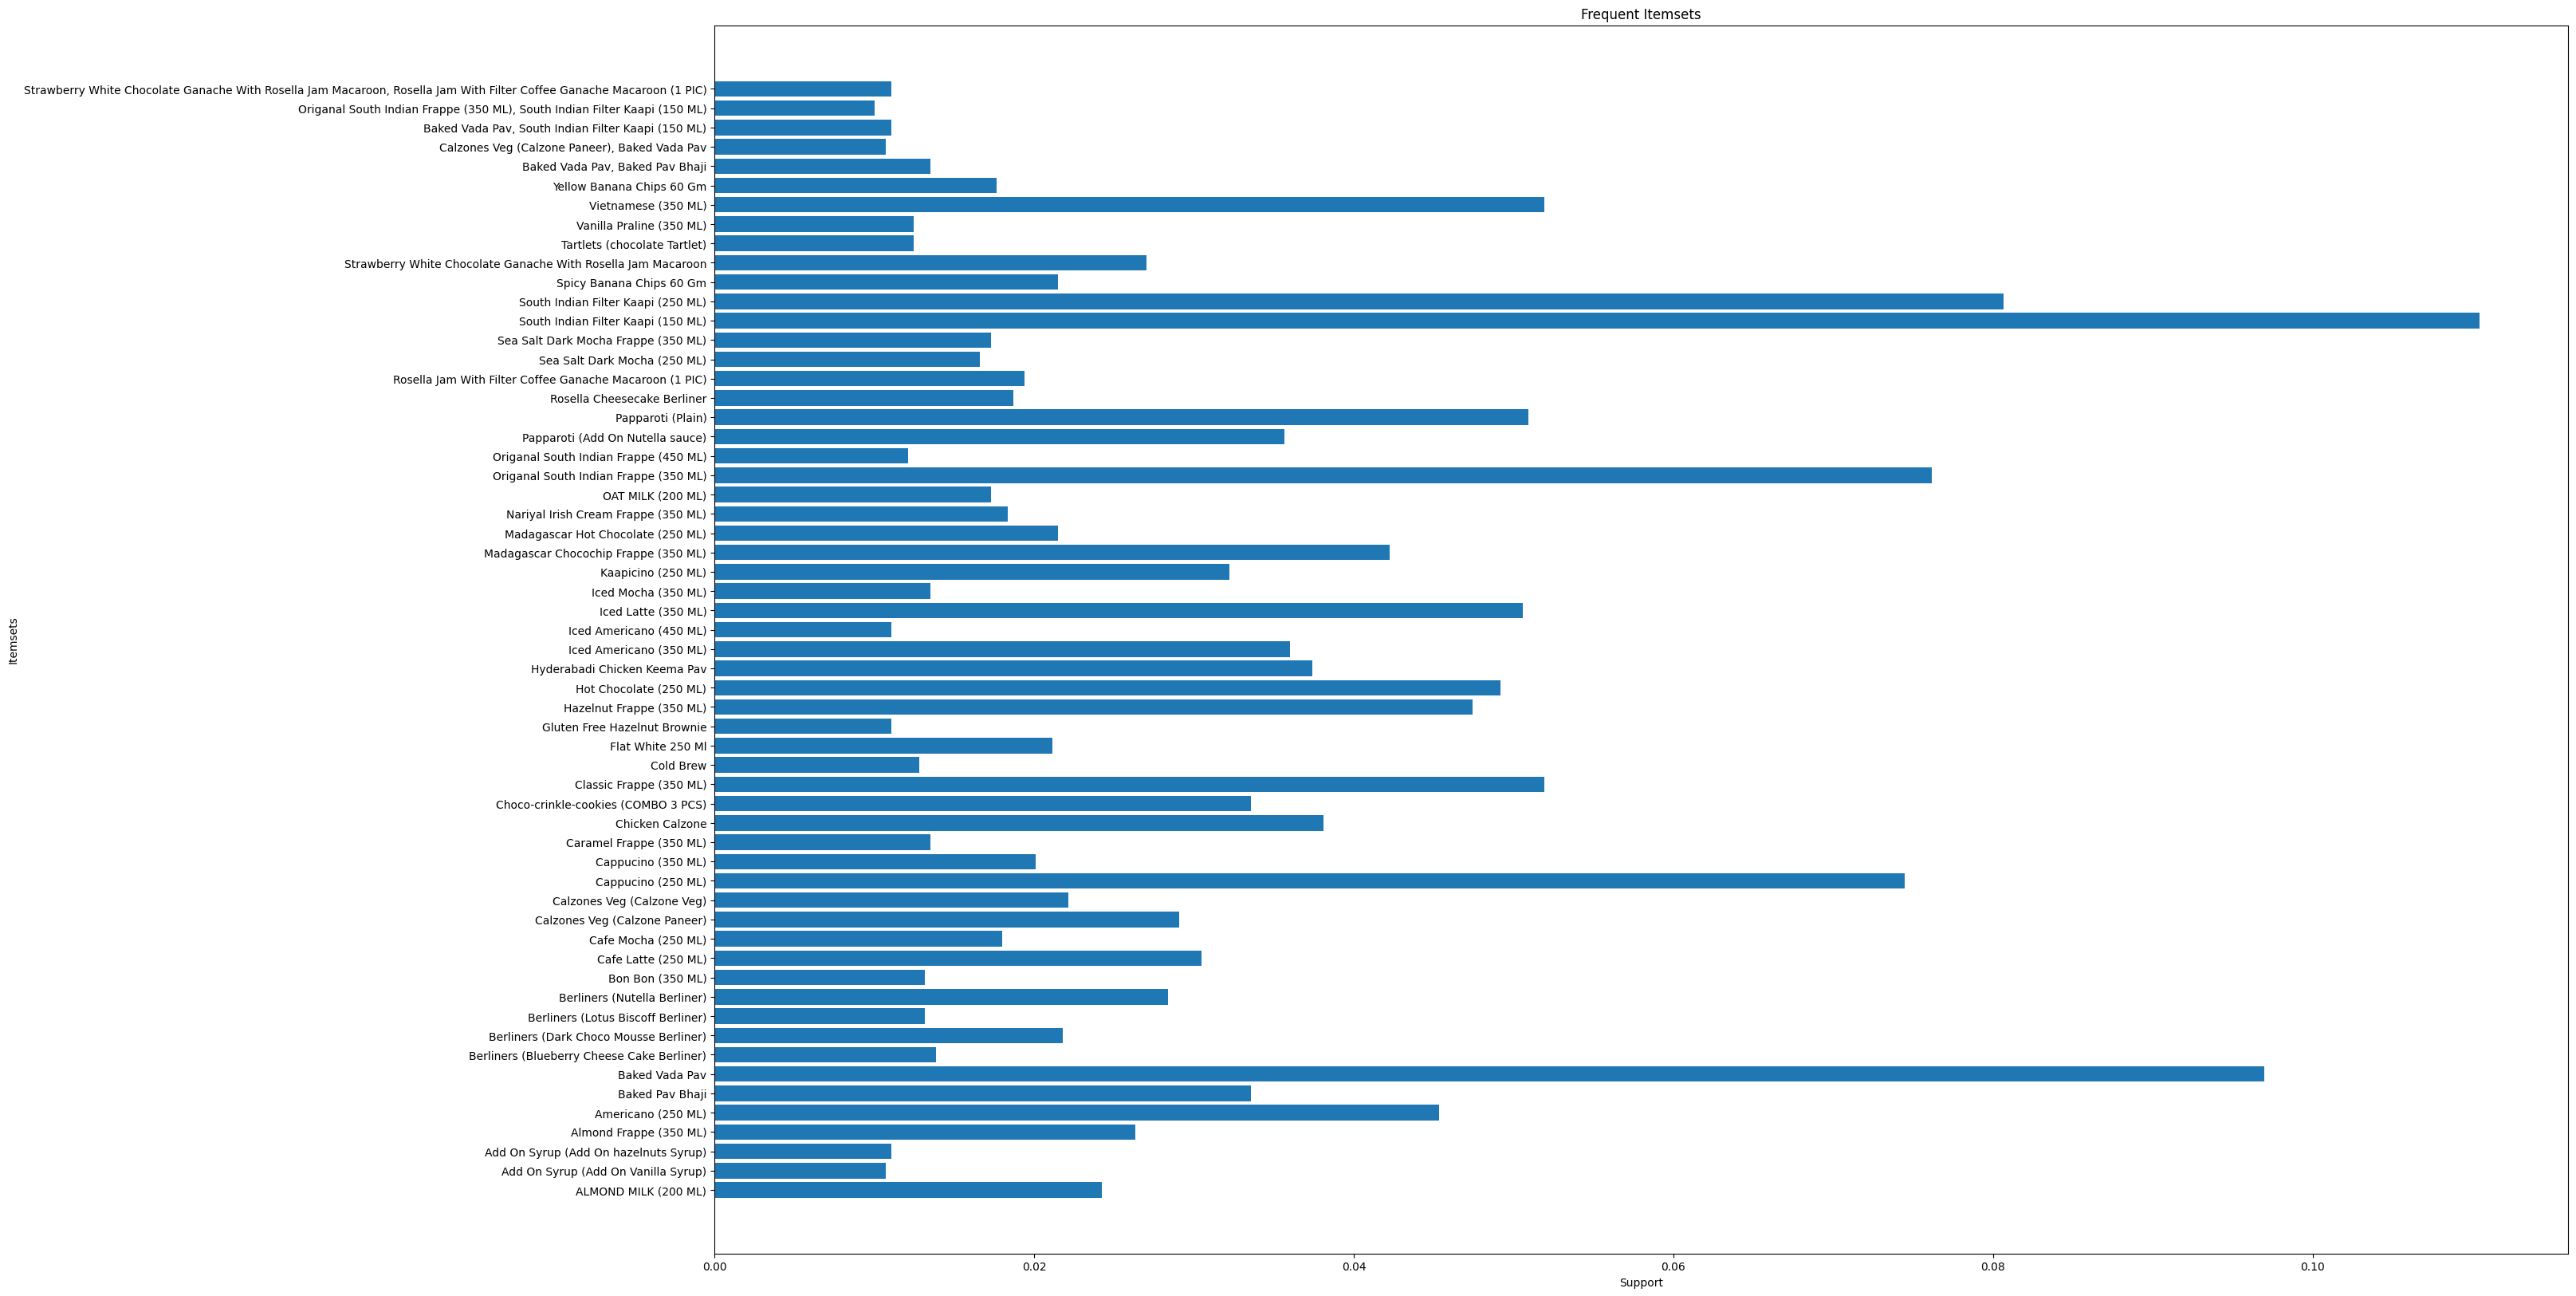

In [23]:
import matplotlib.pyplot as plt

# Plot frequent itemsets
plt.figure(figsize=(30, 20))
plt.barh(range(len(frequent_itemsets)), frequent_itemsets['support'], align='center')
plt.yticks(range(len(frequent_itemsets)), frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x))))
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.show()
